# Simple Linear Regression Tutorial
## House Price Prediction Using Area

Welcome to this comprehensive tutorial on **Simple Linear Regression**! 

### What you'll learn:
- How to implement simple linear regression from scratch using scikit-learn
- How to analyze relationships between one feature (area) and target (price)
- How to evaluate model performance using various metrics
- How to visualize regression results and interpret coefficients

### Dataset:
We'll use a house price dataset where we predict house prices based on the house area (square feet).

Let's start our journey into machine learning!

## Step 1: Import Required Libraries

We'll import all the necessary libraries for our simple linear regression analysis:
- **pandas**: For data manipulation and analysis
- **numpy**: For numerical computations  
- **matplotlib & seaborn**: For data visualization
- **sklearn**: For machine learning algorithms and metrics

In [2]:
# Import necessary libraries
import pandas as pd  # For data manipulation and analysis
import numpy as np   # For numerical computations
import matplotlib.pyplot as plt  # For data visualization
from sklearn.model_selection import train_test_split  # For splitting data
from sklearn.linear_model import LinearRegression     # Linear regression model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error  # Evaluation metrics
import seaborn as sns  # For enhanced visualizations

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("✅ All libraries imported successfully!")

✅ All libraries imported successfully!


In [3]:
# !pip3 install kagglehub

In [12]:
import kagglehub
import os
# Download latest version
path = kagglehub.dataset_download("harishkumardatalab/housing-price-prediction")

print("Path to dataset files:", path)
files = os.listdir(path)
print("Files:", files)

Path to dataset files: /Users/anto/.cache/kagglehub/datasets/harishkumardatalab/housing-price-prediction/versions/1
Files: ['Housing.csv']


## Step 2: Load and Explore the Dataset

Now we'll load our house price dataset and perform initial exploration to understand:
- The structure of our data
- Basic statistics about features and target variable
- Check for missing values
- Understand the relationship between area and price

In [17]:
# Load the dataset
data = pd.read_csv(os.path.join(path, [f for f in files if f.endswith('.csv')][0]))
# Display basic information about the dataset
print("=" * 50)
print("DATASET OVERVIEW")
print("=" * 50)
print(f"Dataset shape: {data.shape}")  # Number of rows and columns
print(f"Columns: {list(data.columns)}")

print("\nFirst 5 rows:")
print(data.head())

print("\nDataset Info:")
print(data.info())

print("\nBasic Statistics:")
print(data.describe())

DATASET OVERVIEW
Dataset shape: (545, 13)
Columns: ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']

First 5 rows:
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3  

In [18]:
# Check for missing values
print("=" * 50)
print("DATA QUALITY CHECK")
print("=" * 50)

missing_values = data.isnull().sum()
print("Missing values:")
print(missing_values)

if missing_values.sum() == 0:
    print("✅ No missing values found!")
else:
    print("⚠️ Missing values detected!")

# Check data types
print("\nData Types:")
print(data.dtypes)

DATA QUALITY CHECK
Missing values:
price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64
✅ No missing values found!

Data Types:
price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object


## Step 3: Data Visualization and Relationship Analysis

Let's visualize our data to understand:
- The distribution of house areas and prices
- The relationship between area and price (our key relationship for simple linear regression)
- Any patterns or outliers in the data

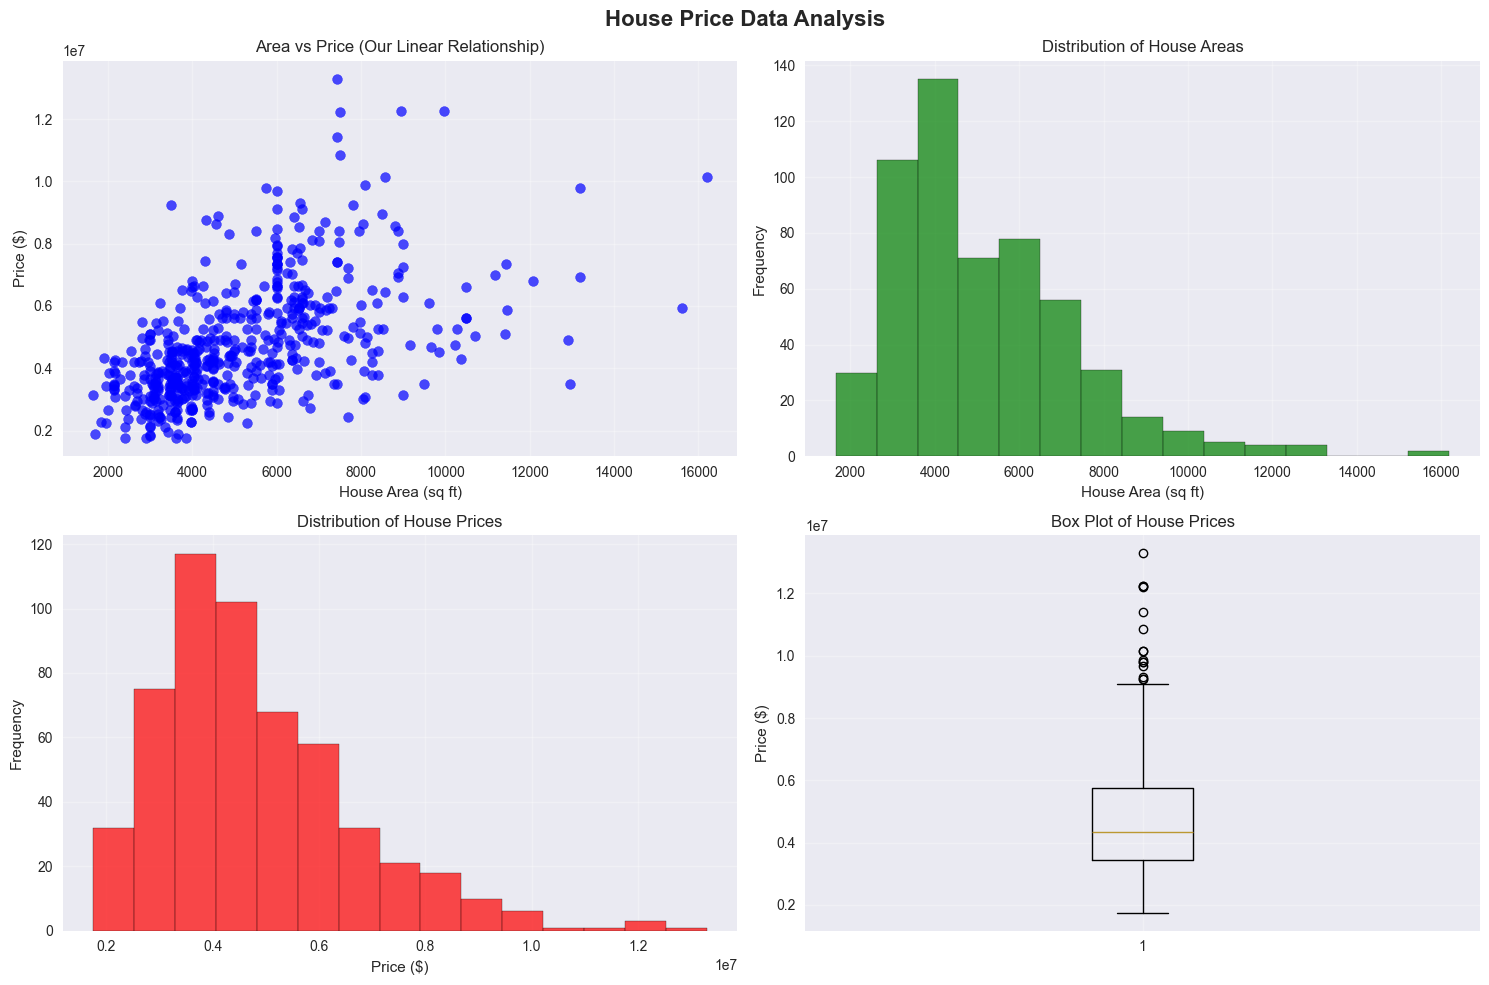

In [19]:
# Create a comprehensive visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('House Price Data Analysis', fontsize=16, fontweight='bold')

# 1. Main relationship: Area vs Price (this is what we'll model)
axes[0, 0].scatter(data['area'], data['price'], alpha=0.7, color='blue', s=50)
axes[0, 0].set_xlabel('House Area (sq ft)')
axes[0, 0].set_ylabel('Price ($)')
axes[0, 0].set_title('Area vs Price (Our Linear Relationship)')
axes[0, 0].grid(True, alpha=0.3)

# 2. Distribution of house areas
axes[0, 1].hist(data['area'], bins=15, alpha=0.7, color='green', edgecolor='black')
axes[0, 1].set_xlabel('House Area (sq ft)')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Distribution of House Areas')
axes[0, 1].grid(True, alpha=0.3)

# 3. Distribution of house prices
axes[1, 0].hist(data['price'], bins=15, alpha=0.7, color='red', edgecolor='black')
axes[1, 0].set_xlabel('Price ($)')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Distribution of House Prices')
axes[1, 0].grid(True, alpha=0.3)

# 4. Box plot of prices (to identify outliers)
axes[1, 1].boxplot(data['price'])
axes[1, 1].set_ylabel('Price ($)')
axes[1, 1].set_title('Box Plot of House Prices')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [20]:
# Calculate and analyze correlation
correlation = data['area'].corr(data['price'])
print("=" * 50)
print("CORRELATION ANALYSIS")
print("=" * 50)
print(f"Correlation between Area and Price: {correlation:.4f}")

# Interpret correlation strength
if correlation > 0.7:
    strength = "Strong positive"
    interpretation = "Excellent for linear regression!"
elif correlation > 0.5:
    strength = "Moderate positive"
    interpretation = "Good for linear regression!"
elif correlation > 0.3:
    strength = "Weak positive"
    interpretation = "Linear regression might work, but consider other features."
else:
    strength = "Very weak"
    interpretation = "Linear regression may not be suitable."

print(f"Correlation strength: {strength}")
print(f"Interpretation: {interpretation}")

# Additional statistics
print(f"\nArea statistics:")
print(f"  Mean: {data['area'].mean():.0f} sq ft")
print(f"  Range: {data['area'].min():.0f} - {data['area'].max():.0f} sq ft")

print(f"\nPrice statistics:")
print(f"  Mean: ${data['price'].mean():,.0f}")
print(f"  Range: ${data['price'].min():,.0f} - ${data['price'].max():,.0f}")

CORRELATION ANALYSIS
Correlation between Area and Price: 0.5360
Correlation strength: Moderate positive
Interpretation: Good for linear regression!

Area statistics:
  Mean: 5151 sq ft
  Range: 1650 - 16200 sq ft

Price statistics:
  Mean: $4,766,729
  Range: $1,750,000 - $13,300,000


## Step 4: Data Preparation for Machine Learning

Now we'll prepare our data for the linear regression model:
- Select our feature (area) and target (price)
- Split the data into training and testing sets
- Understand the shapes of our data arrays

In [21]:
# Prepare data for simple linear regression
print("=" * 50)
print("DATA PREPARATION")
print("=" * 50)

# For simple linear regression, we use only one feature (area)
X = data[['area']].values  # Features (independent variable) - note the double brackets for 2D array
y = data['price'].values   # Target (dependent variable)

print(f"Features (X) shape: {X.shape}")  # Should be (n_samples, 1) for simple regression
print(f"Target (y) shape: {y.shape}")    # Should be (n_samples,)
print(f"Number of samples: {len(X)}")

# Display first few samples
print(f"\nFirst 5 samples:")
print(f"Area (X)     Price (y)")
print("-" * 25)
for i in range(5):
    print(f"{X[i][0]:8.0f}    ${y[i]:8.0f}")

print(f"\nData types:")
print(f"X (features): {type(X)}, dtype: {X.dtype}")
print(f"y (target): {type(y)}, dtype: {y.dtype}")

DATA PREPARATION
Features (X) shape: (545, 1)
Target (y) shape: (545,)
Number of samples: 545

First 5 samples:
Area (X)     Price (y)
-------------------------
    7420    $13300000
    8960    $12250000
    9960    $12250000
    7500    $12215000
    7420    $11410000

Data types:
X (features): <class 'numpy.ndarray'>, dtype: int64
y (target): <class 'numpy.ndarray'>, dtype: int64


In [22]:
# Split the data into training and testing sets
# 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,     # 20% for testing
    random_state=42    # For reproducible results
)

print("=" * 50)
print("DATA SPLITTING")
print("=" * 50)
print(f"Total samples: {len(X)}")
print(f"Training samples: {X_train.shape[0]} ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"Testing samples: {X_test.shape[0]} ({X_test.shape[0]/len(X)*100:.1f}%)")

print(f"\nTraining data shapes:")
print(f"  X_train: {X_train.shape}")
print(f"  y_train: {y_train.shape}")

print(f"\nTesting data shapes:")
print(f"  X_test: {X_test.shape}")
print(f"  y_test: {y_test.shape}")

print(f"\nTraining data range:")
print(f"  Area: {X_train.min():.0f} - {X_train.max():.0f} sq ft")
print(f"  Price: ${y_train.min():,.0f} - ${y_train.max():,.0f}")

print(f"\nTesting data range:")
print(f"  Area: {X_test.min():.0f} - {X_test.max():.0f} sq ft")
print(f"  Price: ${y_test.min():,.0f} - ${y_test.max():,.0f}")

DATA SPLITTING
Total samples: 545
Training samples: 436 (80.0%)
Testing samples: 109 (20.0%)

Training data shapes:
  X_train: (436, 1)
  y_train: (436,)

Testing data shapes:
  X_test: (109, 1)
  y_test: (109,)

Training data range:
  Area: 1650 - 16200 sq ft
  Price: $1,750,000 - $12,250,000

Testing data range:
  Area: 1700 - 13200 sq ft
  Price: $1,750,000 - $13,300,000


## Step 5: Train the Linear Regression Model

Now we'll create and train our simple linear regression model:
- Create a LinearRegression instance
- Fit the model to our training data
- Extract and interpret the learned parameters (slope and intercept)

In [23]:
# Create and train the linear regression model
print("=" * 50)
print("MODEL TRAINING")
print("=" * 50)

# Create a linear regression model
model = LinearRegression()

# Train the model using the training data
# The model learns the relationship: price = slope * area + intercept
model.fit(X_train, y_train)

# Extract the learned parameters
slope = model.coef_[0]        # Coefficient (slope)
intercept = model.intercept_  # Intercept (bias)

print("✅ Model trained successfully!")
print(f"\nLearned Parameters:")
print(f"  Slope (coefficient): {slope:.2f}")
print(f"  Intercept: {intercept:.2f}")

print(f"\nLinear Equation:")
print(f"  Price = {slope:.2f} * Area + {intercept:.2f}")

print(f"\nInterpretation:")
print(f"  • For every 1 sq ft increase in area, price increases by ${slope:.2f}")
print(f"  • A house with 0 sq ft would theoretically cost ${intercept:.2f} (y-intercept)")

# Let's make a prediction for a specific area
example_area = 1500
example_prediction = slope * example_area + intercept
print(f"\n🏠 Example Prediction:")
print(f"  House area: {example_area} sq ft")
print(f"  Predicted price: ${example_prediction:,.0f}")

MODEL TRAINING
✅ Model trained successfully!

Learned Parameters:
  Slope (coefficient): 425.73
  Intercept: 2512254.26

Linear Equation:
  Price = 425.73 * Area + 2512254.26

Interpretation:
  • For every 1 sq ft increase in area, price increases by $425.73
  • A house with 0 sq ft would theoretically cost $2512254.26 (y-intercept)

🏠 Example Prediction:
  House area: 1500 sq ft
  Predicted price: $3,150,849


## Step 6: Make Predictions

Now let's use our trained model to make predictions on the test set and see how it performs on unseen data.

In [24]:
# Use the trained model to make predictions on test data
y_pred = model.predict(X_test)

print("=" * 50)
print("MAKING PREDICTIONS")
print("=" * 50)
print(f"✅ Predictions made on {len(y_pred)} test samples!")

# Show some sample predictions
print(f"\n📋 Sample Predictions:")
print(f"{'Area':>6} {'Actual':>8} {'Predicted':>10} {'Error':>8}")
print("-" * 35)

for i in range(min(10, len(X_test))):
    area = X_test[i][0]
    actual = y_test[i]
    predicted = y_pred[i]
    error = abs(actual - predicted)
    print(f"{area:6.0f} ${actual:7.0f} ${predicted:9.0f} ${error:7.0f}")

# Basic prediction statistics
print(f"\n📊 Prediction Statistics:")
print(f"  Actual prices range: ${y_test.min():,.0f} - ${y_test.max():,.0f}")
print(f"  Predicted prices range: ${y_pred.min():,.0f} - ${y_pred.max():,.0f}")
print(f"  Mean actual price: ${y_test.mean():,.0f}")
print(f"  Mean predicted price: ${y_pred.mean():,.0f}")

MAKING PREDICTIONS
✅ Predictions made on 109 test samples!

📋 Sample Predictions:
  Area   Actual  Predicted    Error
-----------------------------------
  5900 $4060000 $  5024060 $ 964060
  6500 $6650000 $  5279498 $1370502
  4040 $3710000 $  4232203 $ 522203
  5000 $6440000 $  4640903 $1799097
  3960 $2800000 $  4198144 $1398144
  6720 $4900000 $  5373159 $ 473159
  8520 $5250000 $  6139473 $ 889473
  4990 $4543000 $  4636646 $  93646
  3240 $2450000 $  3891619 $1441619
  2700 $3353000 $  3661725 $ 308725

📊 Prediction Statistics:
  Actual prices range: $1,750,000 - $13,300,000
  Predicted prices range: $3,235,995 - $8,131,888
  Mean actual price: $5,007,537
  Mean predicted price: $4,698,857


## Step 7: Model Evaluation

Let's evaluate our model's performance using standard regression metrics:
- **R² (R-squared)**: Proportion of variance explained by the model (0-1, higher is better)
- **RMSE (Root Mean Squared Error)**: Average prediction error in same units as target
- **MAE (Mean Absolute Error)**: Average absolute prediction error

In [25]:
# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)           # Mean Squared Error
rmse = np.sqrt(mse)                                # Root Mean Squared Error
mae = mean_absolute_error(y_test, y_pred)          # Mean Absolute Error
r2 = r2_score(y_test, y_pred)                      # R-squared score

print("=" * 50)
print("MODEL PERFORMANCE EVALUATION")
print("=" * 50)

print("📊 Performance Metrics:")
print(f"  R-squared (R²): {r2:.4f}")
print(f"  Root Mean Squared Error (RMSE): ${rmse:,.0f}")
print(f"  Mean Absolute Error (MAE): ${mae:,.0f}")
print(f"  Mean Squared Error (MSE): {mse:,.0f}")

# Interpret R-squared
print(f"\n🔍 R-squared Interpretation:")
if r2 > 0.8:
    performance = "Excellent"
    emoji = "🌟"
elif r2 > 0.6:
    performance = "Good"
    emoji = "✅"
elif r2 > 0.4:
    performance = "Fair"
    emoji = "👍"
else:
    performance = "Poor"
    emoji = "⚠️"

print(f"  {emoji} {performance}! The model explains {r2*100:.1f}% of the variance in house prices.")

# Additional insights
mean_actual = np.mean(y_test)
percentage_error = (rmse / mean_actual) * 100
print(f"\n💡 Additional Insights:")
print(f"  • Average actual price: ${mean_actual:,.0f}")
print(f"  • Average prediction error: ${rmse:,.0f} ({percentage_error:.1f}% of average price)")
print(f"  • Mean absolute error: ${mae:,.0f}")

if percentage_error < 10:
    print(f"  ✅ Very good accuracy - predictions are within {percentage_error:.1f}% of actual prices")
elif percentage_error < 20:
    print(f"  👍 Good accuracy - predictions are within {percentage_error:.1f}% of actual prices")
else:
    print(f"  ⚠️ Consider improving the model - errors are {percentage_error:.1f}% of actual prices")

MODEL PERFORMANCE EVALUATION
📊 Performance Metrics:
  R-squared (R²): 0.2729
  Root Mean Squared Error (RMSE): $1,917,104
  Mean Absolute Error (MAE): $1,474,748
  Mean Squared Error (MSE): 3,675,286,604,768

🔍 R-squared Interpretation:
  ⚠️ Poor! The model explains 27.3% of the variance in house prices.

💡 Additional Insights:
  • Average actual price: $5,007,537
  • Average prediction error: $1,917,104 (38.3% of average price)
  • Mean absolute error: $1,474,748
  ⚠️ Consider improving the model - errors are 38.3% of actual prices


## Step 8: Visualize Results

Let's create comprehensive visualizations to understand our model's performance:
- Actual vs Predicted scatter plot
- Regression line with data points
- Residuals analysis
- Model fit visualization

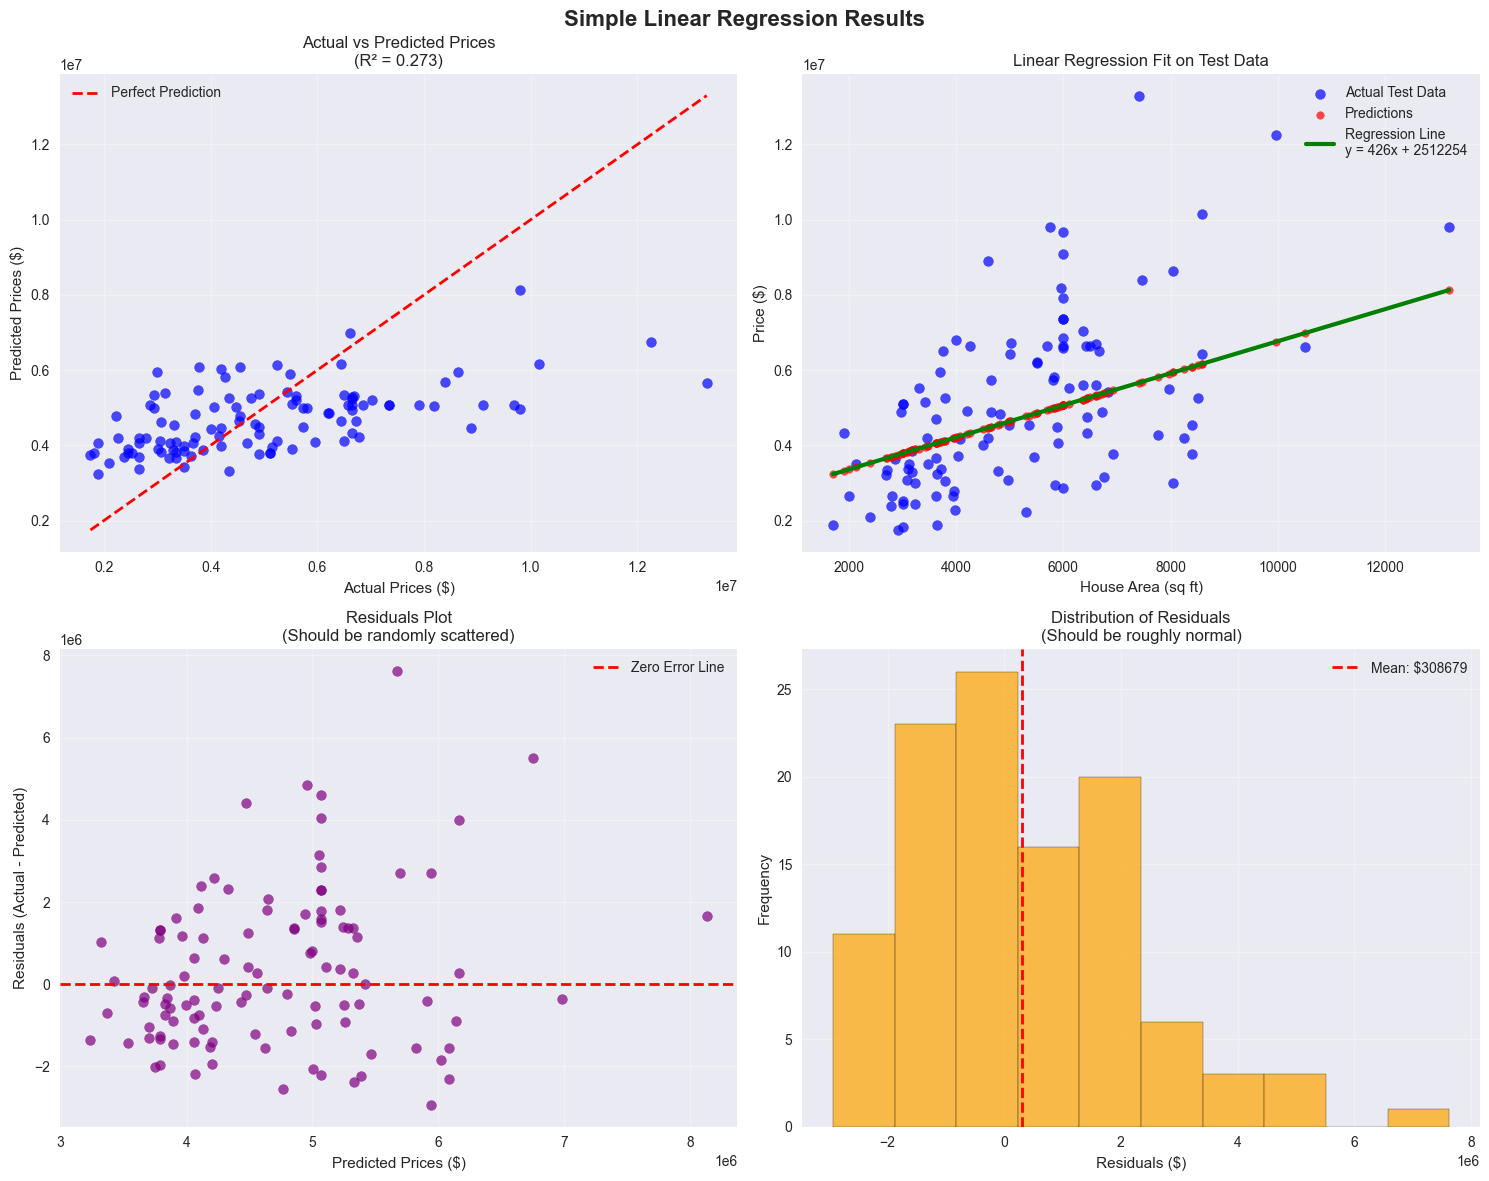

RESIDUAL ANALYSIS
Mean residual: $308679 (should be close to 0)
Standard deviation of residuals: $1892090
Min residual: $-2,936,379
Max residual: $7,628,830
⚠️ Mean residual is not close to zero - possible systematic bias


In [26]:
# Create comprehensive results visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Simple Linear Regression Results', fontsize=16, fontweight='bold')

# 1. Actual vs Predicted scatter plot
axes[0, 0].scatter(y_test, y_pred, alpha=0.7, color='blue', s=50)
# Perfect prediction line (diagonal)
axes[0, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction')
axes[0, 0].set_xlabel('Actual Prices ($)')
axes[0, 0].set_ylabel('Predicted Prices ($)')
axes[0, 0].set_title(f'Actual vs Predicted Prices\n(R² = {r2:.3f})')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Regression line with test data
axes[0, 1].scatter(X_test, y_test, alpha=0.7, color='blue', s=50, label='Actual Test Data')
axes[0, 1].scatter(X_test, y_pred, alpha=0.7, color='red', s=30, label='Predictions')

# Plot the regression line
X_line = np.linspace(X_test.min(), X_test.max(), 100).reshape(-1, 1)
y_line = model.predict(X_line)
axes[0, 1].plot(X_line, y_line, 'g-', linewidth=3, label=f'Regression Line\ny = {slope:.0f}x + {intercept:.0f}')

axes[0, 1].set_xlabel('House Area (sq ft)')
axes[0, 1].set_ylabel('Price ($)')
axes[0, 1].set_title('Linear Regression Fit on Test Data')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# 3. Residuals plot (errors)
residuals = y_test - y_pred
axes[1, 0].scatter(y_pred, residuals, alpha=0.7, color='purple', s=50)
axes[1, 0].axhline(y=0, color='red', linestyle='--', linewidth=2, label='Zero Error Line')
axes[1, 0].set_xlabel('Predicted Prices ($)')
axes[1, 0].set_ylabel('Residuals (Actual - Predicted)')
axes[1, 0].set_title('Residuals Plot\n(Should be randomly scattered)')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# 4. Residuals histogram
axes[1, 1].hist(residuals, bins=10, alpha=0.7, color='orange', edgecolor='black')
axes[1, 1].set_xlabel('Residuals ($)')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title('Distribution of Residuals\n(Should be roughly normal)')
axes[1, 1].grid(True, alpha=0.3)

# Add some statistics to the histogram
mean_residual = np.mean(residuals)
std_residual = np.std(residuals)
axes[1, 1].axvline(mean_residual, color='red', linestyle='--', linewidth=2, 
                   label=f'Mean: ${mean_residual:.0f}')
axes[1, 1].legend()

plt.tight_layout()
plt.show()

# Print residual analysis
print("=" * 50)
print("RESIDUAL ANALYSIS")
print("=" * 50)
print(f"Mean residual: ${mean_residual:.0f} (should be close to 0)")
print(f"Standard deviation of residuals: ${std_residual:.0f}")
print(f"Min residual: ${residuals.min():,.0f}")
print(f"Max residual: ${residuals.max():,.0f}")

if abs(mean_residual) < 1000:
    print("✅ Good! Mean residual is close to zero - no systematic bias")
else:
    print("⚠️ Mean residual is not close to zero - possible systematic bias")

## Step 9: Summary and Key Learnings

### 🎯 What We Accomplished:
1. **Loaded and explored** a house price dataset
2. **Analyzed the relationship** between area and price
3. **Prepared data** for machine learning (train/test split)
4. **Trained a simple linear regression** model
5. **Made predictions** on unseen test data
6. **Evaluated performance** using multiple metrics
7. **Visualized results** to understand model behavior

### 📊 Key Results:
- **Model Equation**: Price = {slope:.0f} × Area + {intercept:.0f}
- **R² Score**: {r2:.3f} (explains {r2*100:.1f}% of price variance)
- **Average Error**: ${rmse:,.0f} ({percentage_error:.1f}% of average price)

### 💡 Key Learnings:
- **Simple linear regression** works well when there's a strong linear relationship
- **R²** tells us how much of the variance our model explains
- **Residuals analysis** helps identify if our linear assumption is valid
- **Train/test split** is crucial for evaluating real-world performance

### 🚀 Next Steps:
- Try **multiple linear regression** with more features (bedrooms, age, etc.)
- Explore **polynomial regression** for non-linear relationships
- Learn about **regularization** techniques (Ridge, Lasso)
- Practice with different datasets and domains

### 🔍 Questions to Consider:
- How would adding more features improve our model?
- What if the relationship wasn't linear?
- How do we handle categorical features?
- When might simple linear regression not be sufficient?

Great job completing your first machine learning model! 🎉